In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import numpy as np
import scipy as sp

from numpy import polyfit
from scipy import stats

import seaborn as sns
sns.set_style('whitegrid', {'axes.grid' : False})

import matplotlib
import matplotlib.pyplot as plt
# plot settings
font = {'family' : 'Verdana',
        'weight' : 'regular',
        'size'   : 15}
figure = {'figsize' : (20,8)}
matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)

## We're going to make two highly correlated variables, but give them a slight non-linearity

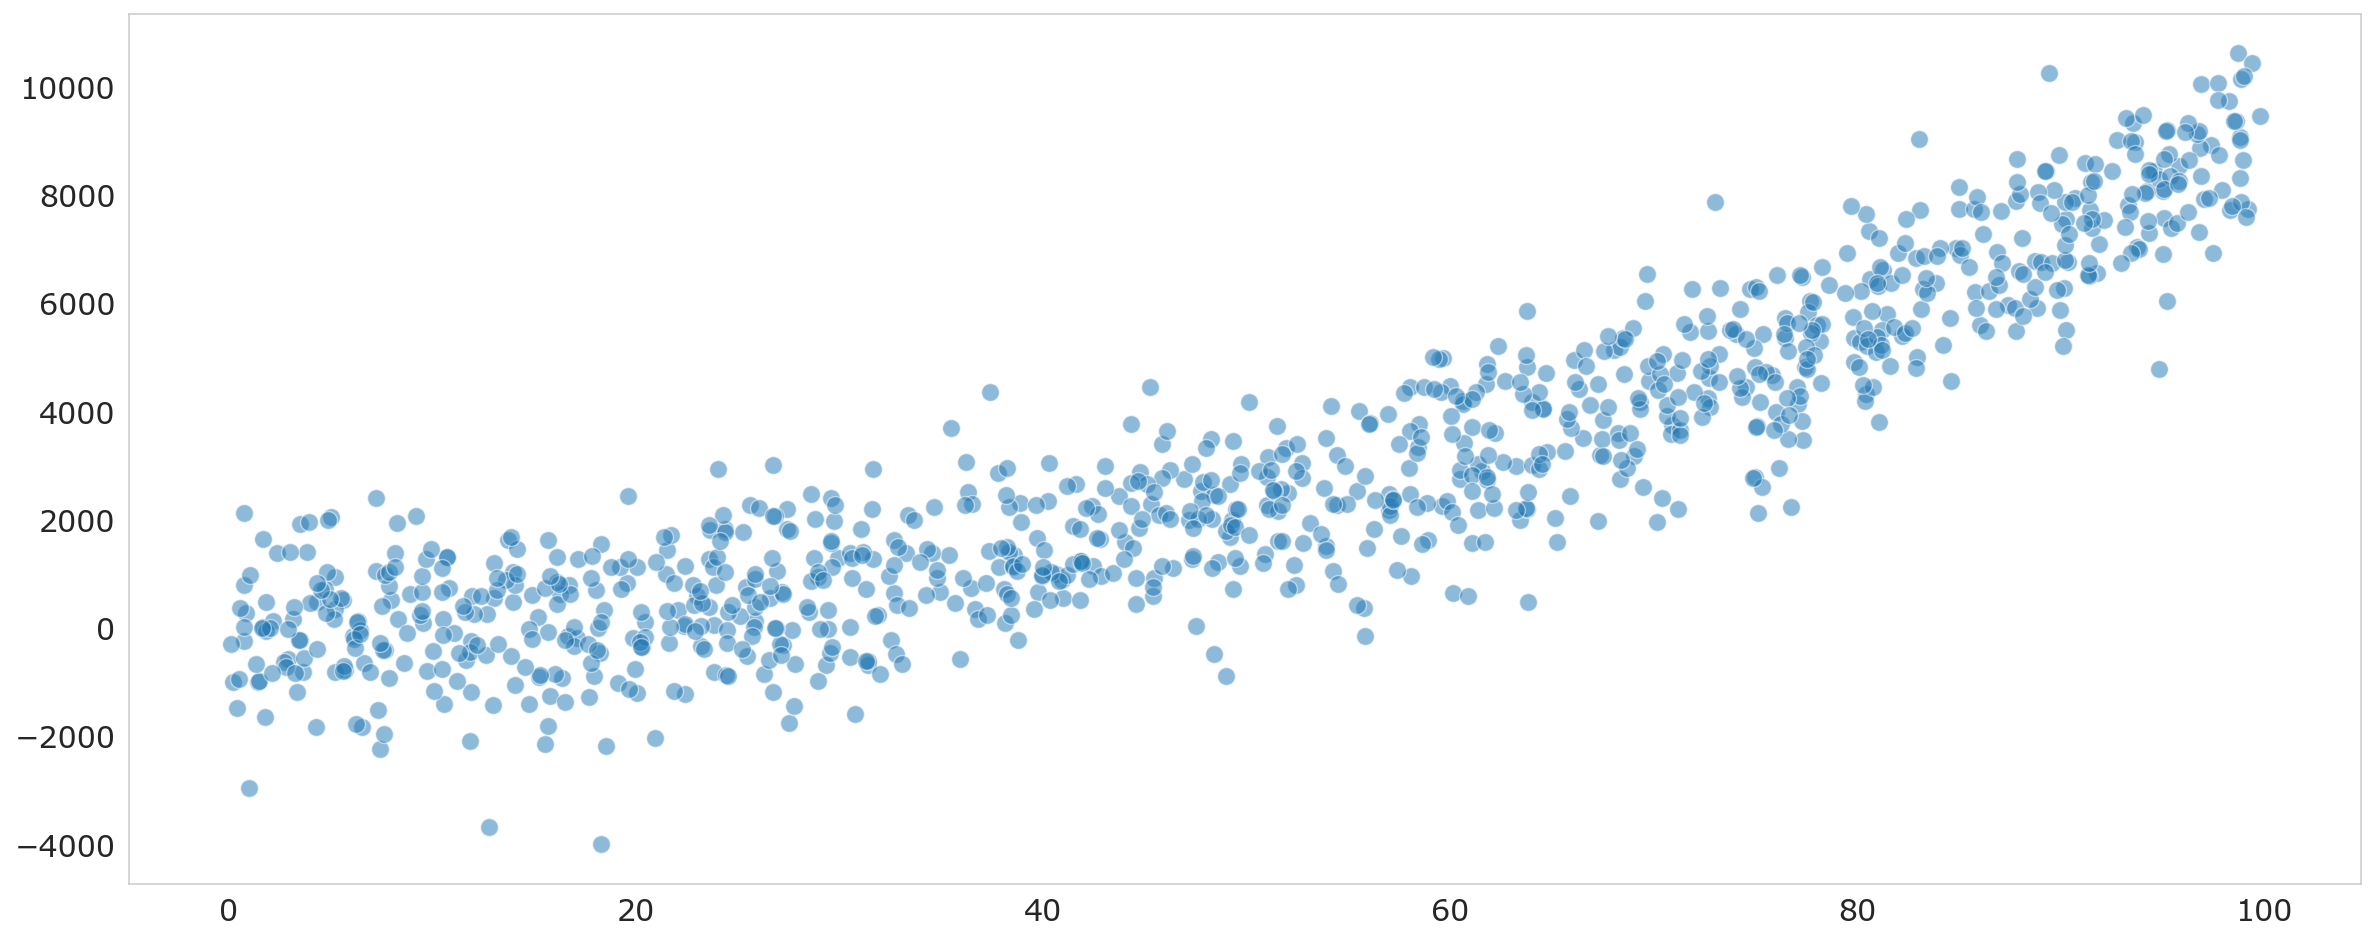

In [5]:
# make variable_x, and make variable_y a function of variable_x plus a little noise to make them highly correlated
variable_x = np.random.uniform(0, 100, 1000)
variable_y = (variable_x**2) - (10*variable_x) + 100
variable_y = variable_y + np.random.normal(0, 1000, 1000)

variable_x = variable_x.T
variable_y = variable_y.T

sns.scatterplot(x=variable_x, y=variable_y, alpha=0.5, s=80)
plt.show()

## Fitting a line to them gives you a significant result, but it's far from the true relationship

 
89.55 x - 1534
r = 0.9002957132034415 , p = 0.0


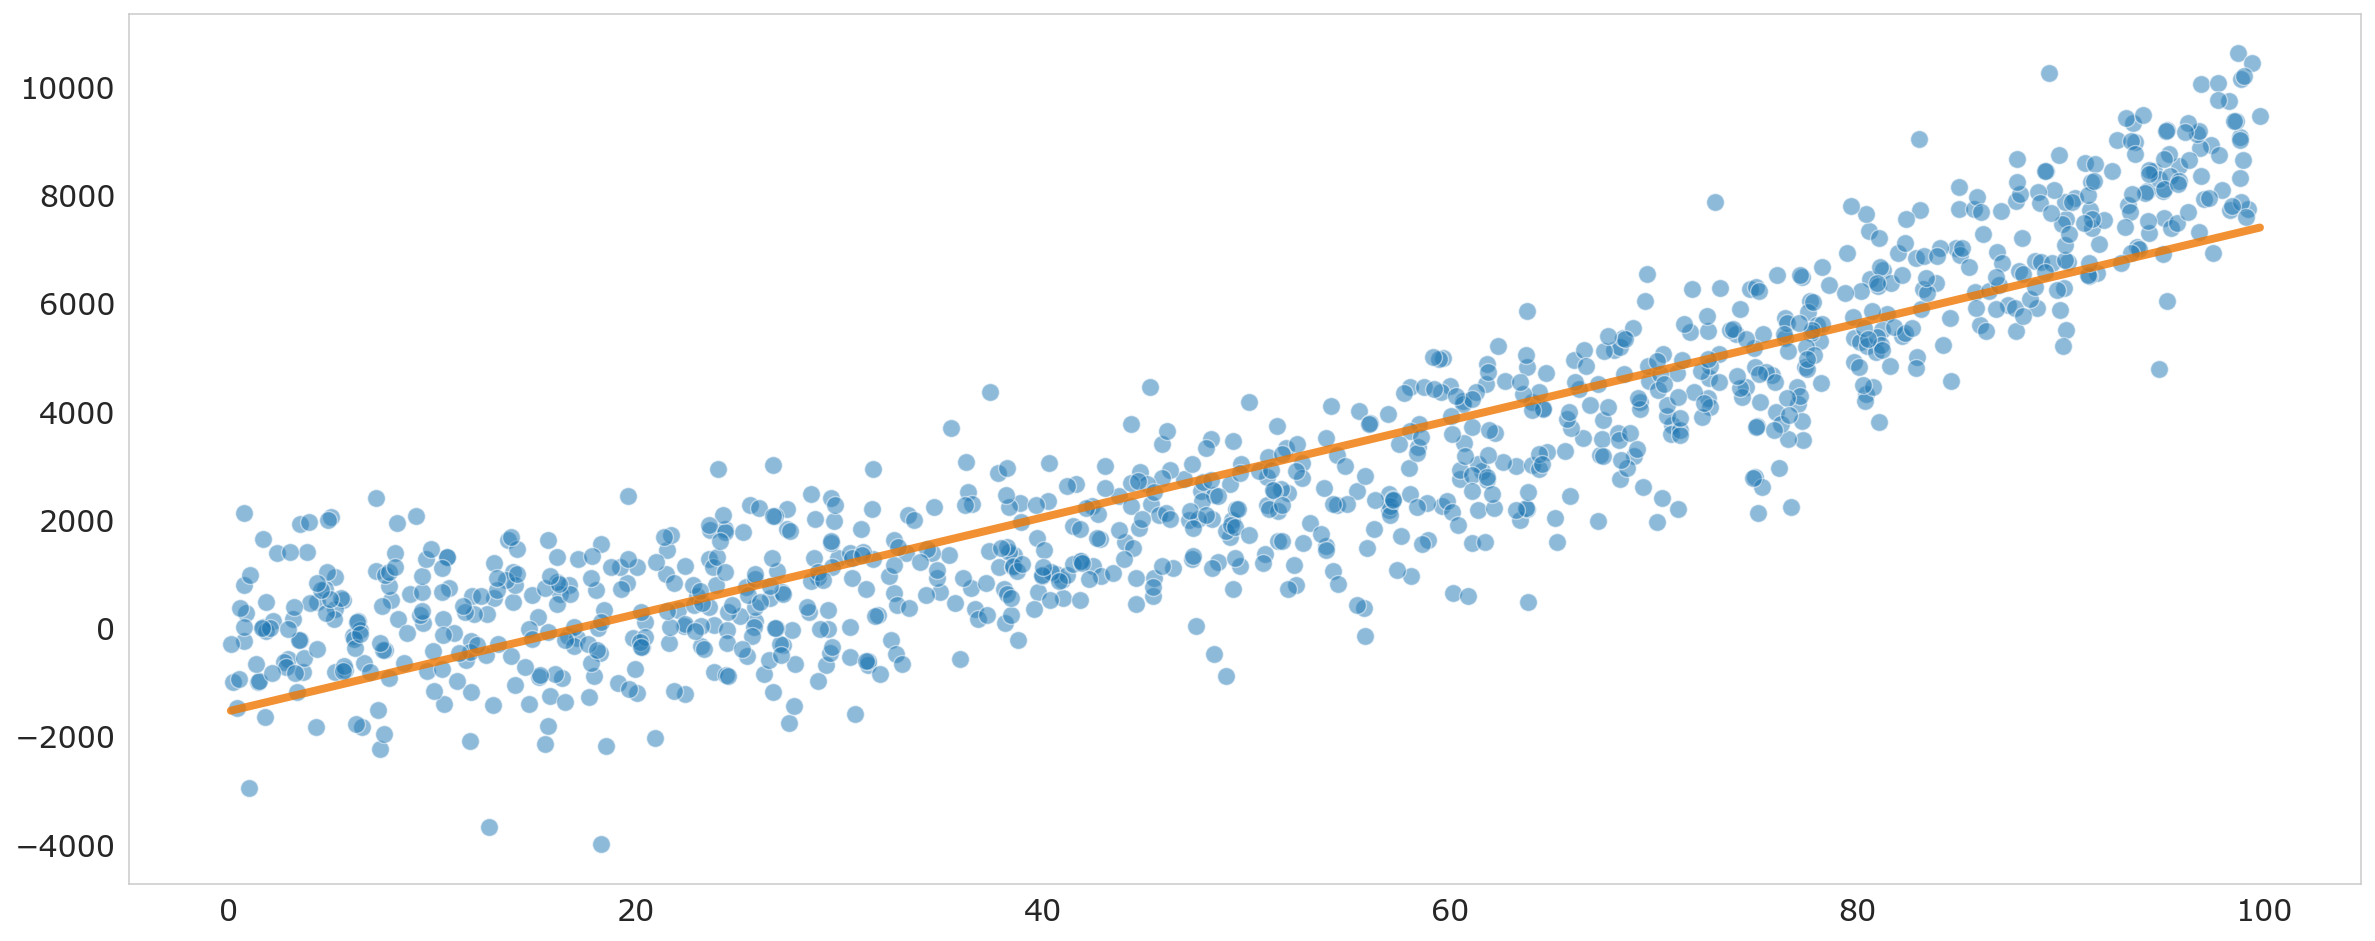

In [10]:
coefficients = polyfit(variable_x, variable_y, 1)
poly = np.poly1d(coefficients)
y_fit = poly(variable_x)

r, p = stats.pearsonr(variable_x, variable_y)

print(poly)
print('r =', r, ', p =', p)
sns.scatterplot(x=variable_x, y=variable_y, alpha=0.5, s=80)
sns.lineplot(x=variable_x, y=y_fit, alpha=0.8, color='#ee7600', linewidth = 4.)
plt.show()

## Performing a non-linear fit gives a better result!

        2
0.9592 x - 5.872 x + 27.07


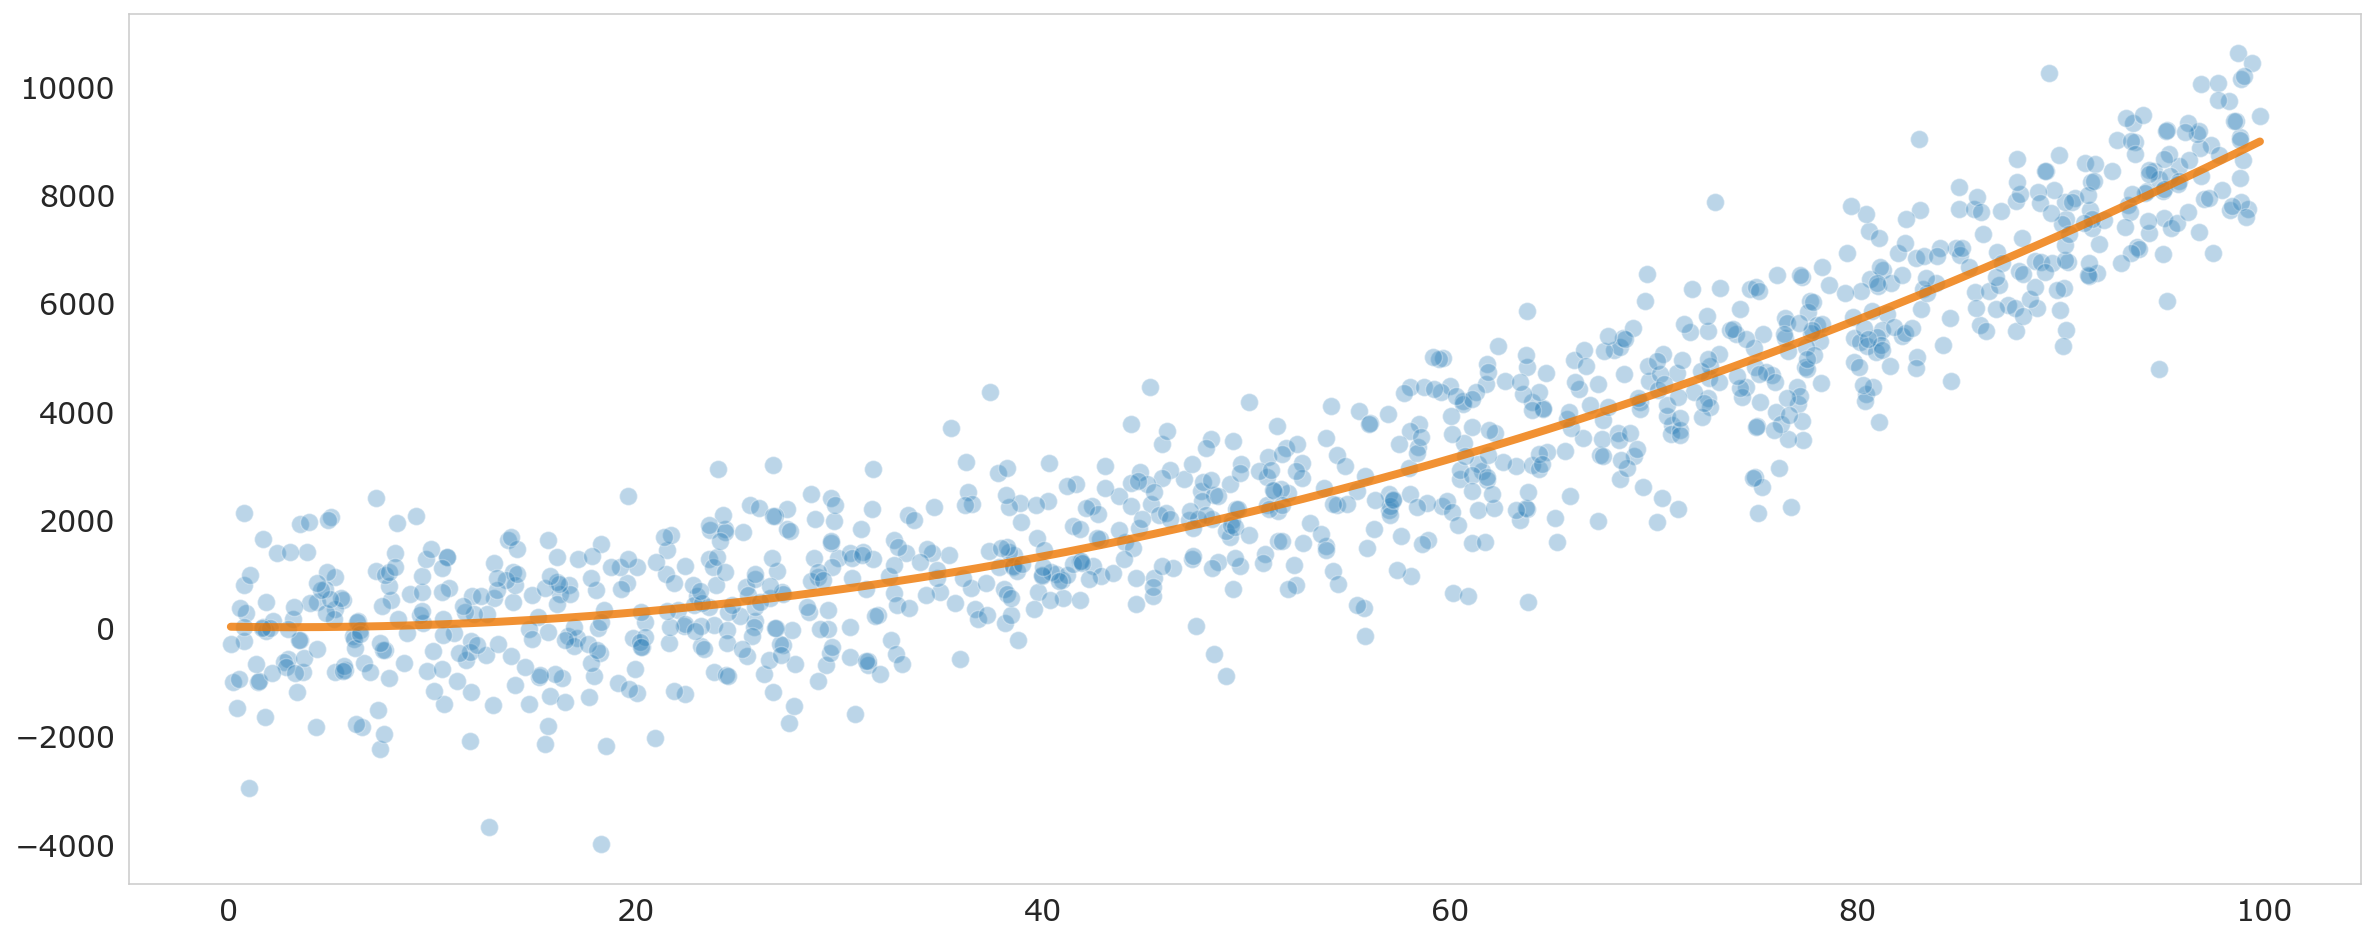

In [12]:
coefficients = polyfit(variable_x, variable_y, 2)
poly = np.poly1d(coefficients)
y_fit = poly(variable_x)

print(poly)
sns.scatterplot(x=variable_x, y=variable_y, alpha=0.3, s=80)
sns.lineplot(x=variable_x, y=y_fit, alpha=0.8, color='#ee7600', linewidth = 4.)
plt.show()

## Now, of course we can go wild with this, and practically connect the dots, which gives a "great fit", but at what cost?

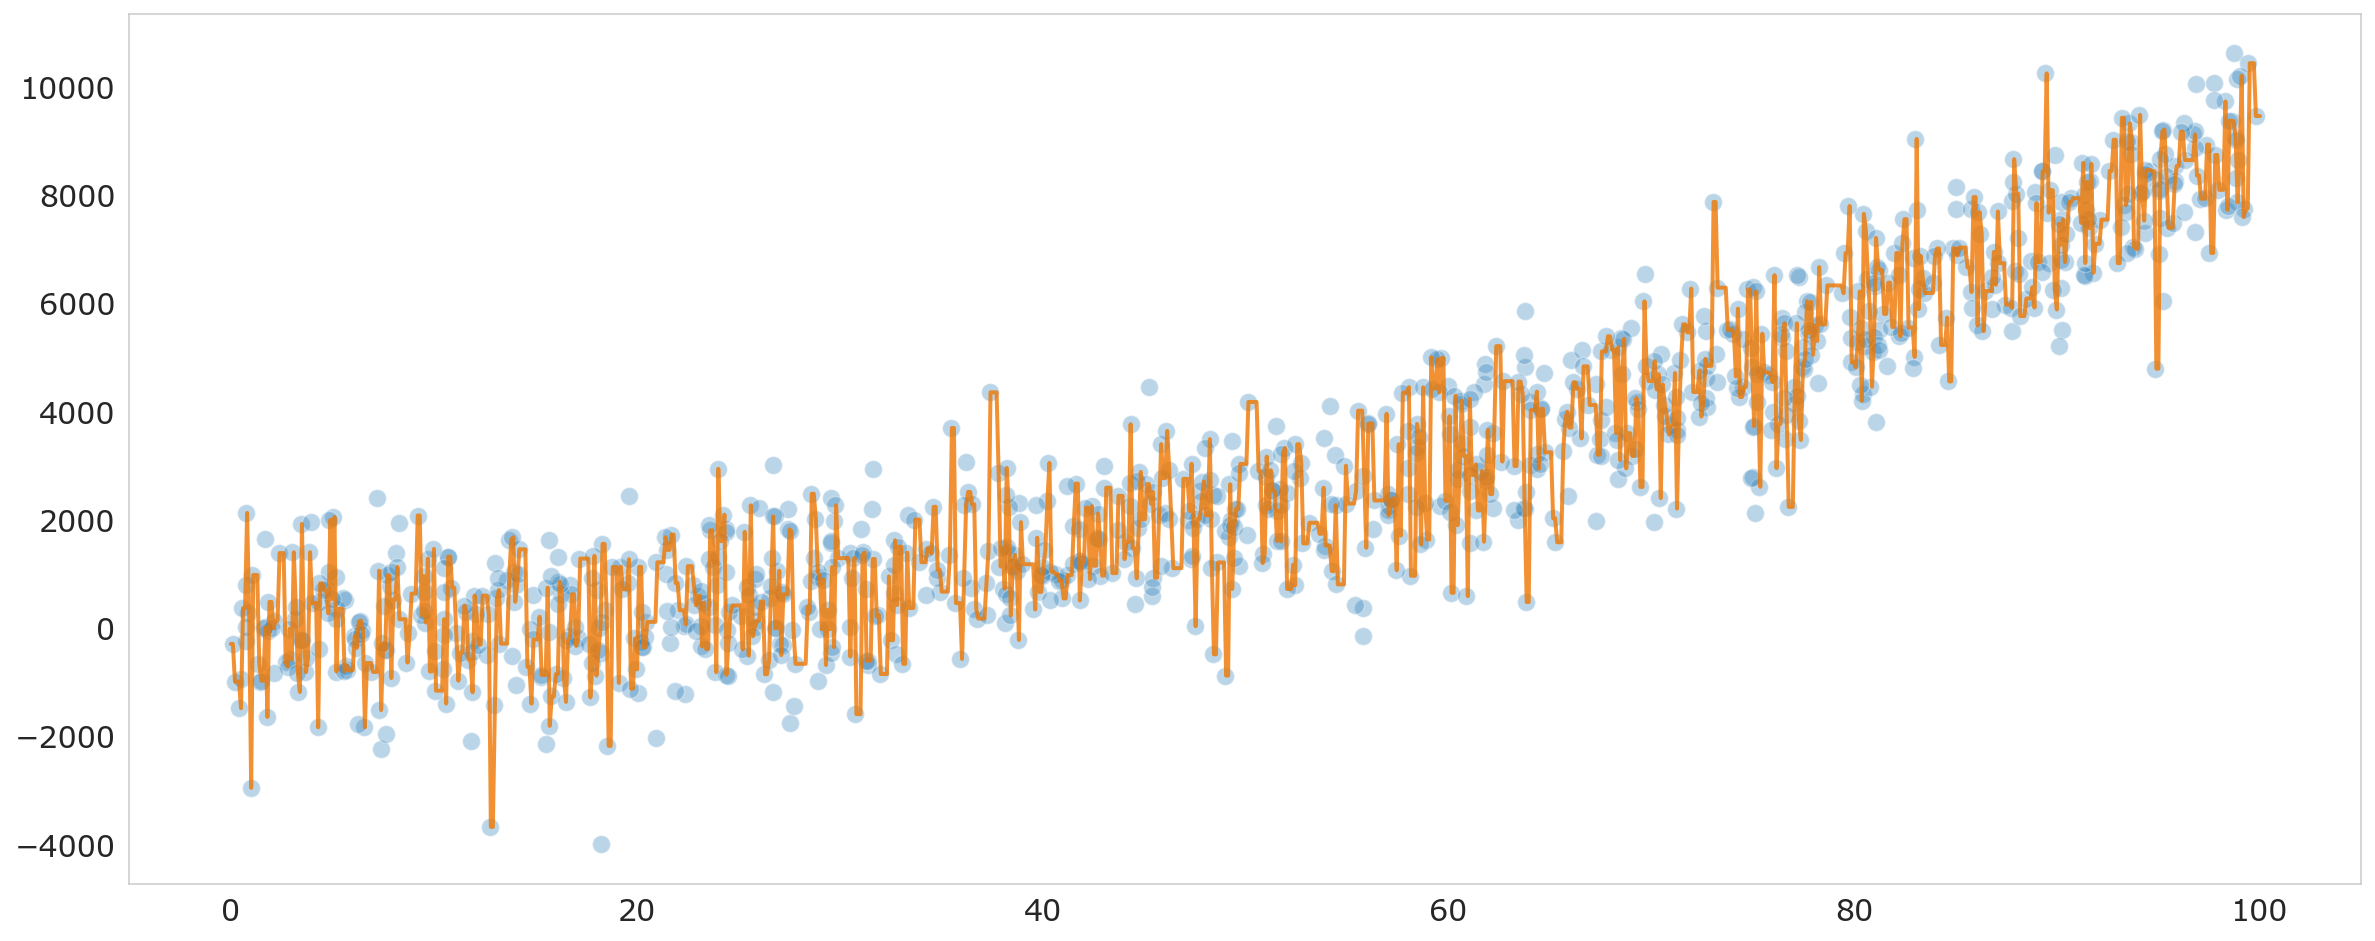

In [23]:
from scipy.interpolate import interp1d

f2 = interp1d(variable_x, variable_y, kind='zero', fill_value="extrapolate")
xnew = np.linspace(0, 100, num=1000, endpoint=True)

sns.scatterplot(x=variable_x, y=variable_y, alpha=0.3, s=80)
sns.lineplot(x=xnew, y=f2(xnew), alpha=0.8, color='#ee7600', linewidth = 2.)
plt.show()